# With Gradient Descent Instead of Difference

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.special import softmax

from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit

def softmax(z, epsilon=1e-10):
    # Subtract the maximum value from the logits
    z = z - np.max(z, keepdims=True)
    
    # Compute the exponentiated logits
    exp_z = np.exp(z)
    
    # Normalize the exponentiated logits to obtain the class probabilities
    return exp_z / (np.sum(exp_z, keepdims=True) + epsilon)

In [11]:
X = np.load("C:/Users/pchourasia1/Desktop/Anderson/data/pca_embeddings/spike/kmer_Frequency_Vector_7000_PCA_500.npy")
attribute_data = np.load("C:/Users/pchourasia1/Desktop/Anderson/data/pca_embeddings/spike/seq_data_variant_names_7000.npy")

In [12]:
attr_new = []
for i in range(len(attribute_data)):
    aa = str(attribute_data[i]).replace("[","")
    aa_1 = aa.replace("]","")
    aa_2 = aa_1.replace("\'","")
    attr_new.append(aa_2)

unique_hst = list(np.unique(attr_new))

int_hosts = []
for ind_unique in range(len(attr_new)):
    variant_tmp = attr_new[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

y = np.array(int_hosts[:])

sss = ShuffleSplit(n_splits=1, test_size=0.3)

sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=68)


Attribute data preprocessing Done


In [13]:
# # def perceptron_aa(X, y, n_iterations, alpha):
# n_classes = 22
# n_features = 100
# # n_iterations = 10

# train_sample_size = 10000
# # Load the training data and labels
# X_train = np.random.randn(train_sample_size, n_features)
# y_train = np.random.randint(n_classes, size=train_sample_size)

# # Load the test data and labels
# testing_sample_size = 3000
# X_test = np.random.randn(testing_sample_size, n_features)
# y_test = np.random.randint(n_classes, size=testing_sample_size)


# total_classes = len(np.unique(y_train))

In [14]:
# Set the number of iterations
n_iterations = 10

# Run the Perceptron algorithm with Anderson acceleration using different values of alpha
alpha_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# alpha_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

losses = []
for alpha in alpha_values:
    #w, loss, acc = perceptron_aa_2(X_train, y_train, n_iterations, alpha)
    
    
    ##################################
    # Convert the labels to one-hot encoded labels
    y_one_hot = np.eye(np.max(y_train) + 1)[y_train]
    
    # Initialize the weight vector, loss list, and accuracy list
#     w = np.random.randn(X_train.shape[1])
    w = np.random.randn(X_train.shape[1],X_train.shape[1])
#     w = np.random.randn(n_features,n_features)
#     w = np.random.randn(X_train.shape[1])
    
    loss = []
    accuracy = []
    
    # Initialize the weight vector history
    w_history = [w]
    
    # Run the Perceptron algorithm with Anderson acceleration
    for i in range(n_iterations):
        # Initialize the loss and the number of correct predictions for this iteration
        iter_loss = 0
        n_correct = 0
        
        # Initialize the gradient
        grad = np.zeros(X_train.shape[1])
        
        # Loop through the training data and compute the gradient
#         for x, y in zip(X_train, y_one_hot):
        for x, y in zip(X_train, y_train):
            # Predict the class using the current weight vector
            y_pred = np.dot(w, x)
            
            # Normalize the prediction
            y_pred = y_pred / np.sum(y_pred)
            
            y_pred=softmax(y_pred)
            
            # Compute the gradient for this sample
            grad += y - y_pred
            
            # Compute the loss for this sample
            sample_loss = -np.sum(y * np.log(y_pred + 0.0001))
            
            # Increment the loss and the number of correct predictions for this iteration
            iter_loss += sample_loss
            n_correct += int(np.argmax(y_pred) == np.argmax(y))
        
        # Average the gradient over the number of samples
        grad /= len(X_train)
        
        # Add the updated weight vector to the history
        w_history.append(w)
        
        # If we have enough past weight vectors, perform Anderson acceleration
        if len(w_history) > 2:
            # Compute the difference between the current weight vector and the previous one
            diff = w_history[-1] - w_history[-2]
            
            # Update the current weight vector using Anderson acceleration
            w += alpha * diff + grad
        else:
            # Update the current weight vector using the gradient
            w += grad
        
        # Append the loss and the accuracy to their respective lists
        loss.append(iter_loss / len(X_train))
        accuracy.append(n_correct / len(X_train))
    
    
    ######################################
    
    
    losses.append(loss)
    # Make predictions on the test set
    y_pred = np.dot(X_test, w)

    # Compute the accuracy on the test set
    y_pred_all = []
    for ii in range(len(y_pred)):
        y_pred_all.append(np.argmax(y_pred[ii]))
    test_accuracy = np.mean(y_pred_all == y_test)
    print("For Alpha Value: " + str(alpha) + ", test accuracy: ",test_accuracy)

For Alpha Value: 0.1, test accuracy:  0.028095238095238097
For Alpha Value: 0.2, test accuracy:  0.0
For Alpha Value: 0.3, test accuracy:  0.0
For Alpha Value: 0.4, test accuracy:  0.0
For Alpha Value: 0.5, test accuracy:  0.3871428571428571


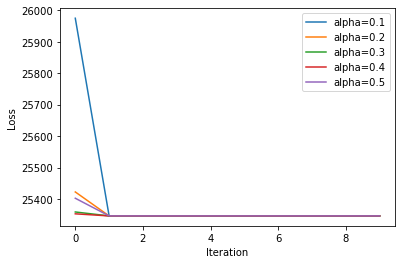

In [15]:
# Plot the loss for each value of alpha
for i, loss in enumerate(losses):
    plt.plot(loss, label=f'alpha={alpha_values[i]:.1f}')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
import pandas as pd
pd.DataFrame(losses).T

,0,1,2,3,4
0,25975.230133,25422.206337,25358.450716,25352.563264,25402.171782
1,25345.917661,25345.917627,25345.916396,25345.916649,25345.916426
2,25345.916149,25345.916120,25345.916021,25345.916067,25345.916025
3,25345.915978,25345.915969,25345.915940,25345.915956,25345.915940
4,25345.915926,25345.915922,25345.915909,25345.915917,25345.915909
5,25345.915903,25345.915901,25345.915894,25345.915899,25345.915894
6,25345.915891,25345.915890,25345.915885,25345.915889,25345.915886
7,25345.915884,25345.915883,25345.915880,25345.915882,25345.915880
8,25345.915879,25345.915879,25345.915877,25345.915879,25345.915877
9,25345.915876,25345.915876,25345.915875,25345.915876,25345.915875


# SVM With Anderson Acceleration

In [9]:
from sklearn.svm import LinearSVC

class LinearSVCWithAA(LinearSVC):
    def __init__(self, alpha=0.1, n_iterations=10, verbose=False):        
        # Initialize the attributes of the LinearSVCWithAA class
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.loss = []  # Add this line to store the loss values

#         # Initialize the coef_ attribute
# #         self.coef_ = None
#         self.coef_ = np.random.randn(5,)
    
#         # Initialize the coef_prev attribute
#         self.coef_prev = self.coef_
    
    
    def fit_old(self, X, y, n_iterations=100, alpha=0.1):
        # Initialize the weight vector and the bias term
        self.coef_ = np.random.randn(X.shape[1])
        self.intercept_ = np.random.randn()
        
        n_classes = len(np.unique(y))
        n_features = len(X[0])
        self.coef_ = np.random.randn(n_classes, n_features)
        self.coef_prev = self.coef_
        
        # Run the gradient descent algorithm with Anderson acceleration
        for i in range(n_iterations):
            # Compute the gradient
            grad = self._gradient(X, y)
            
            # Update the weight vector and the bias term using Anderson acceleration
#             grad[:-1] = np.expand_dims(grad[:-1], axis=0)
#             grad[:-1] = grad[:-1][:, np.newaxis]
#             self.coef_ += alpha * (self.coef_ - self.coef_prev) + grad[:-1]
#             self.intercept_ += alpha * (self.intercept_ - self.intercept_prev) + grad[-1]
            
            # Save the current weight vector and bias term for the next iteration
            self.coef_prev = self.coef_
            self.intercept_prev = self.intercept_
        
        # Save the number of iterations and the alpha value
        self.n_iterations_ = n_iterations
        self.alpha_ = alpha
      
    
    
    def fit(self, X, y, n_iterations=100, alpha=0.1):
        """
        Fit the model to the training data.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target labels.
        n_iterations : int
            Number of iterations to run the algorithm.
        alpha : float
            Anderson acceleration factor.
        """
        # Convert the labels to one-hot encoded labels
        y_one_hot = np.eye(np.max(y) + 1)[y]

        # Initialize the weight vector and the loss list
#         self.coef_ = np.random.randn(X.shape[1])
#         self.coef_ = np.random.randn(X.shape[1], len(np.unique(y)))
        self.coef_ = np.random.randn(X.shape[1], X.shape[1])
#         loss = []

        # Initialize the weight vector history
        coef_history = [self.coef_]

        # Run the Perceptron algorithm with Anderson acceleration
        for i in range(n_iterations):
            # Compute the gradient
            grad = self._gradient(X, y)

            # Add the updated weight vector to the history
            coef_history.append(self.coef_)

            # If we have enough past weight vectors, perform Anderson acceleration
            if len(coef_history) > 2:
                # Compute the difference between the current weight vector and the previous one
                diff = coef_history[-1] - coef_history[-2]

                # Update the current weight vector using Anderson acceleration
#                 print("self.coef_ ",self.coef_)
#                 print("self.coef_ ",self.coef_)
                self.coef_ += alpha * diff + grad[0]
            else:
                # Update the current weight vector using the gradient
#                 print("self.coef_ ",self.coef_)
#                 print("grad ",grad[0])
                self.coef_ += grad[0]

            # Compute the loss for this iteration
            y_pred = self.predict(X)
#             iter_loss = self.hinge_loss(y,y_pred)
            iter_loss = np.maximum(0, 1 - y * y_pred)
#             print("iter_loss: ",iter_loss)
            #######################################################
            # Compute the loss for this sample
            sample_loss = -np.sum(y * np.log(y_pred))
            # Increment the loss and the number of correct predictions for this iteration
            iter_loss += int(sample_loss)
#             n_correct += int(np.argmax(y_pred) == np.argmax(y))
            # Compute the loss for this iteration
            self.loss.append(np.maximum(0, 1 - y * y_pred))
#             self.loss.append(iter_loss)
            #########################################################

            # Save the previous weight vector
            self.coef_prev = self.coef_

        # Save the number of iterations and the alpha value
        self.n_iterations_ = n_iterations
        self.alpha_ = alpha

    def hinge_loss(self, X, y):
        # Compute the prediction for each sample
        y_pred = self.predict(X)
        
        # Compute the hinge loss for each sample
        loss = np.maximum(0, 1 - y * y_pred)
        
        return loss
    
    def predict_old(self, X):    
        # Compute the class prediction for each sample using the current weight vector
        y_pred = np.dot(X, self.coef_)

        # Normalize the prediction
        y_pred = y_pred / np.sum(y_pred, keepdims=True)

        # Return the class with the highest probability
        return np.argmax(y_pred)
    
    def predict(self, X):
        # Compute the class scores for each sample
        scores = np.dot(X, self.coef_.T)

        # Predict the class for each sample
        y_pred = np.argmax(scores)

        return y_pred
    
#     def predict(self, X):
#         y_pred = np.dot(X, self.coef_)
#         return np.argmax(y_pred, axis=1)

    
    def _gradient(self, X, y):
        # Compute the prediction for each sample
        y_pred = self.predict(X)

        # Compute the gradient of the loss function with respect to the weight vector
#         print("y shape:",y.shape)
#         print("y_pred shape:",y_pred.shape)
        
#         y = np.expand_dims(y, axis=1)
#         print("y again shape:",y.shape)
        
        grad_coef = np.dot(X.T, np.maximum(0, 1 - y * y_pred))
        
        # Average the gradient over the number of samples
        grad_coef /= len(X)
        
        grad_coef = np.squeeze(grad_coef) ###################################################

        # Compute the gradient of the loss function with respect to the bias term
        grad_intercept = np.sum(np.maximum(0, 1 - y * y_pred)) / len(X)

        # Return the gradient as a tuple
        return (grad_coef, grad_intercept)
    
    
    


In [10]:
# Import the necessary libraries
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

n_classes = 5
n_features = 6

train_sample_size = 1000
# Load the training data and labels
X_train = np.random.randn(train_sample_size, n_features)
y_train = np.random.randint(n_classes, size=train_sample_size)

# Load the test data and labels
testing_sample_size = 300
X_test = np.random.randn(testing_sample_size, n_features)
y_test = np.random.randint(n_classes, size=testing_sample_size)
#############################################################################

# Train the model using the LinearSVCWithAA class
model = LinearSVCWithAA()
model.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = []
for i in range(len(X_test)):
    y_pred.append(model.predict(X_test[i]))



# Compute the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision
precision = precision_score(y_test, y_pred, average='macro')

# Compute the recall
recall = recall_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.18
Precision: 0.1653268209640759
Recall: 0.15429067327638987


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Create a LinearSVCWithAA object with Anderson acceleration
svc_aa = LinearSVCWithAA(alpha=0.5)

# Create a LinearSVCWithAA object without Anderson acceleration
svc_no_aa = LinearSVCWithAA(alpha=0)

# Fit the models on the training data
svc_aa.fit(X_train, y_train)
svc_no_aa.fit(X_train, y_train)



In [4]:
# Plot the loss for the two models
plt.plot(svc_aa.loss, label='With Anderson acceleration')
plt.plot(svc_no_aa.loss, label='Without Anderson acceleration')
plt.legend()
plt.show()

In [5]:
aa_loss_val = svc_aa.loss[0]
aa_loss_val